# Neural Networks!
In this example, we are going to make a basic neural network that trains the MNIST fashion dataset.

## Setup
There are two new imports here - Tensorflow and Keras.

Tensorflow - A Python library that helps with the development of machine learning algorithms.

Keras - A high-level neural networks API for Python

In [2]:
import tensorflow as tf
from tensorflow import keras as kr
import numpy as np
import matplotlib.pyplot as plt

These are the type of clothing that our model will predict.

In [3]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Loading the dataset
Instead of using Pandas to load a dataset and read a CSV file, Keras has a feature allowing the programmer to automatically download and use datasets. In this example, we are going to use Keras' fashion dataset (from MNIST).

In [4]:
mnist = kr.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Getting the data ready
Each node in the neural network has a bias, which must be a number from 0 to 1. Right now, each pixel has a grayscale weight from 0 to 255. We need to convert the grayscale data from (0, 255) to (0, 1). We can do this by dividing by 255.

In [5]:
train_images = train_images / 255
test_images  = test_images  / 255

## The model
Now it is time to create the neural network. We will use Keras' Sequential network. `layers.Dense()` creates the different layers of the network, defining the shape of the network. In this example, our neural network has 3 layers:

the input layer (28x28 nodes)

1 hidden layer (128 nodes)

the output layer (10 nodes)

`tf.nn.relu` and `tf.nn.softmax` are differnt activation functions.

In [6]:
model = kr.Sequential([
    kr.layers.Flatten(
        input_shape = (28, 28)
    ),
    kr.layers.Dense(128, activation=tf.nn.relu),
    kr.layers.Dense(len(labels), activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


### More model configuration
We can configure the model a bit further by using the `compile()` method. We can set the optimizer, the loss function that we want to use, and what metrics we want to measure after the model trains.

Optimizer - . In this case, we are using the Adam optimization algorithm.

Loss function - 

In [7]:
model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

## Training the model
Now that the model has been created, we can train the neural network with our training data and training labels.

In [8]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5010 - acc: 0.8236
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3764 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3363 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3140 - acc: 0.8836
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2938 - acc: 0.8913


## Predicting
Now that the neural network has been trained, we can make some predictions about different types of clothing.

In [9]:
predictions = model.predict(test_images)

In [10]:
def plot_image(i, prediction_vectors, true_labels, images):
    prediction_vector, true_label, image = prediction_vectors[i], true_labels[i], images[i]
    
    plt.grid(False)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_vector)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(
        'Guess: {} ({:2.0f} % certain)\nActual: {}'.format(
            labels[predicted_label],
            100 * np.max(prediction_vector),
            labels[true_label]
        )
    )

In [11]:
def plot_value_array(i, prediction_vectors, true_labels):
    prediction_vector, true_labels = prediction_vectors[i], true_labels[i]
    
    plt.grid(False)
    
    plot = plt.bar(
        range(len(labels)),
        prediction_vector,
        color = '#fa34ab'
    )
    
    plt.xlabel('Clothing type')
    plt.ylabel('Certainty')
    
    plt.xticks(
        range(len(labels)),
        labels,
        size='small',
        rotation=90
    )
    
    plt.ylim([0, 1])

    nums = []
    for num in np.arange(0, 120, 20):
        nums.append(str(num) + "%")

    plt.yticks(np.arange(0, 1.2, .2), nums, size='small')

    predicted_label = np.argmax(prediction_vector)
    
    plot[predicted_label].set_color('red')
    plot[true_labels].set_color('blue')

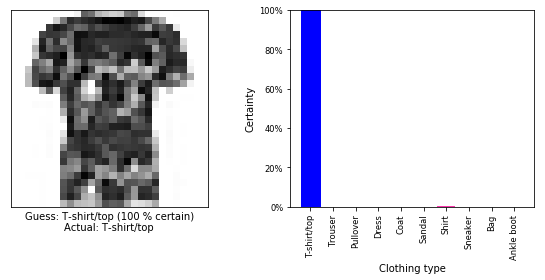

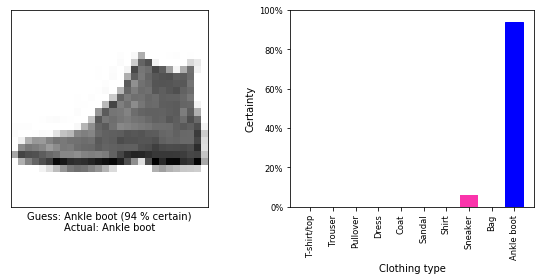

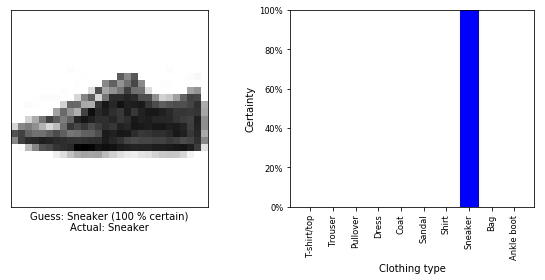

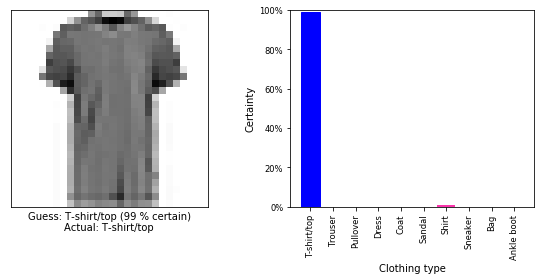

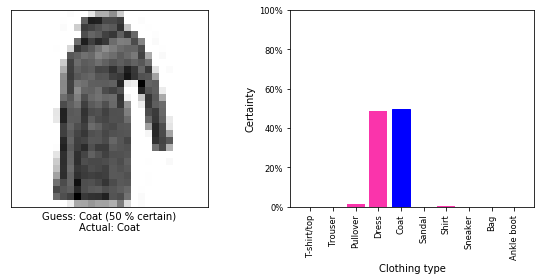

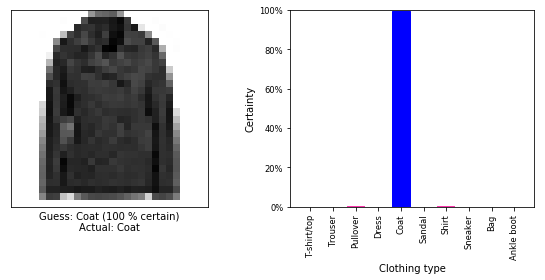

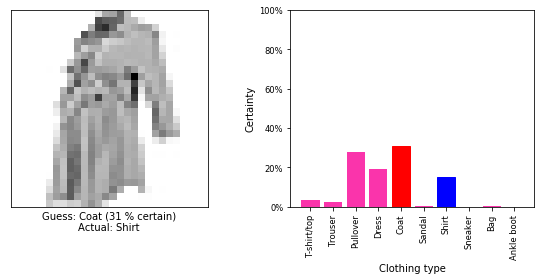

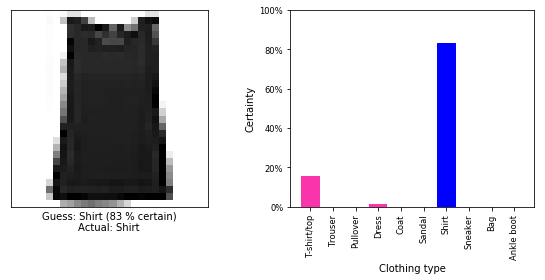

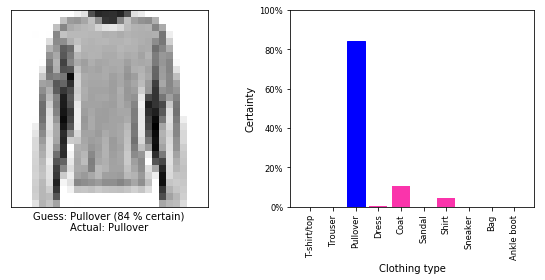

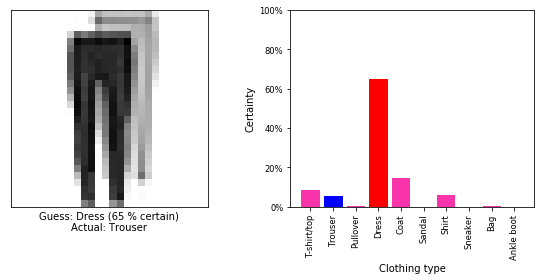

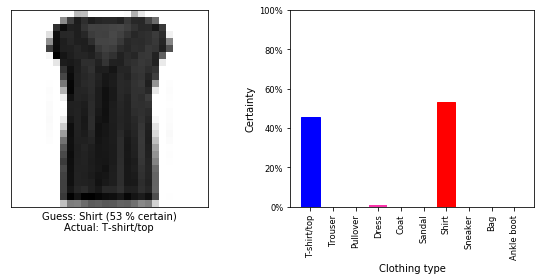

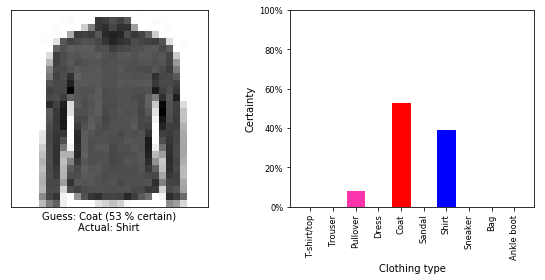

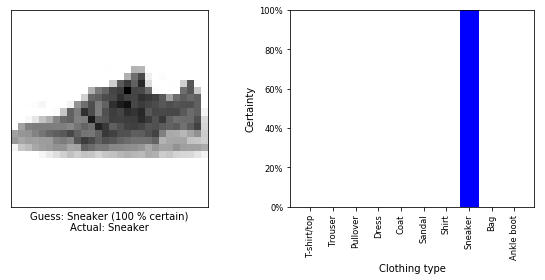

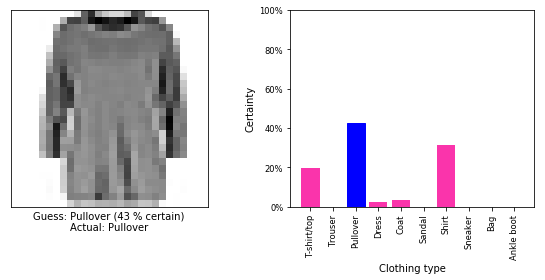

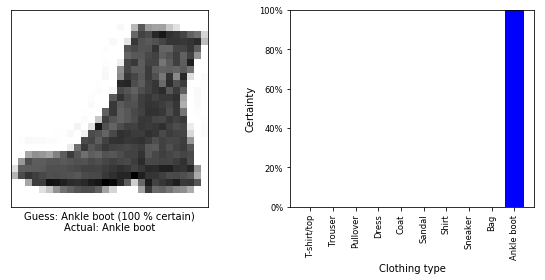

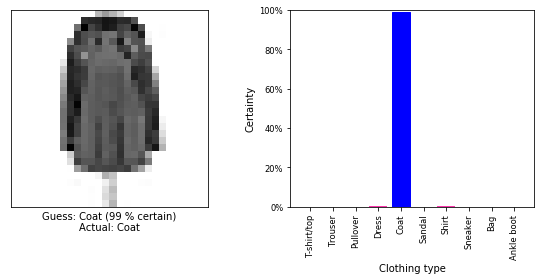

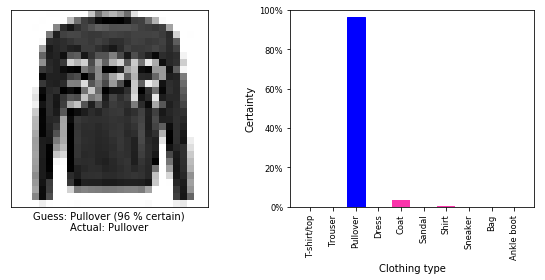

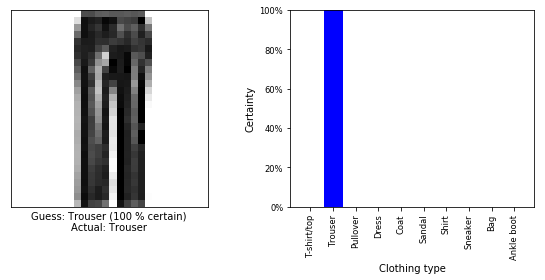

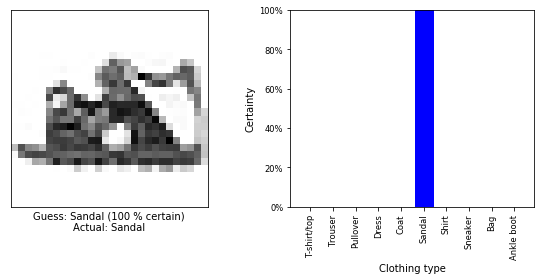

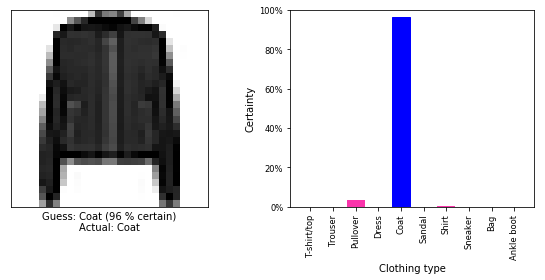

In [12]:
for i in range(400, 420):
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)

    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1, 2, 2)

    plot_value_array(i, predictions, test_labels)

    plt.tight_layout()
    plt.show()
    

## Analysis
We can analyze the accuracy of our model.

In [13]:
print("Accuracy: " + str(model.evaluate(test_images, test_labels))) 

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3894 - acc: 0.8584
Accuracy: [0.3893915023088455, 0.8584]
